In [1]:
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [7]:
patient_data <- read.csv("scratch/tractoflow_hcp_dwi/patient_data.csv")
HCP_ad_data <- read.csv("scratch/tractoflow_hcp_dwi/linear_regression//HCP_ad_data_bin.csv")
HCP_fa_data <- read.csv("scratch/tractoflow_hcp_dwi/linear_regression//HCP_fa_data_bin.csv")
HCP_md_data <- read.csv("scratch/tractoflow_hcp_dwi/linear_regression//HCP_md_data_bin.csv")
HCP_rd_data <- read.csv("scratch/tractoflow_hcp_dwi/linear_regression//HCP_rd_data_bin.csv")

pd_nt=patient_data[patient_data$ZygositySR=='NotTwin',]
pd_t=patient_data[(patient_data$ZygositySR=='MZ' | patient_data$ZygositySR=='NotMZ'),]
pd_t=pd_t[!duplicated(pd_t$Family_ID),]
patient_data=rbind(pd_nt,pd_t)

In [8]:
subj_data <- patient_data[c("Subject", "Age_in_Yrs", "SSAGA_Income", "SSAGA_Educ", "BPSystolic", "BPDiastolic", "HbA1C")]
HCP_fa_data <- merge(HCP_fa_data, subj_data)
HCP_md_data <- merge(HCP_md_data, subj_data)
HCP_ad_data <- merge(HCP_ad_data, subj_data)
HCP_rd_data <- merge(HCP_rd_data, subj_data)

In [9]:
hypo <- c("ad_anterior_hypothalamic_area", "ad_arcuate_hypothalamic_nucleus", "ad_dorsomedial_hypothalamic_nucleus", "ad_lateral_hypothalamus", "ad_mammillary_bodies", "ad_paraventricular_nucleus", "ad_periventricular_hypothalamic_nucleus", "ad_posterior_hypothalamic_nucleus", "ad_suprachiasmatic_hypothalamic_nucleus", "ad_supraoptic_hypothalamic_nucleus", "ad_tuberomammillary_hypothalamic_nucleus", "ad_ventromedial_hypothalamus")
HCP_ad_data$full_hypo <- rowMeans(HCP_ad_data[, hypo], na.rm = TRUE)


Call:
lm(formula = full_hypo ~ BMI + Age_in_Yrs + Gender, data = ad_data_bin)

Residuals:
       Min         1Q     Median         3Q        Max 
-1.454e-04 -2.268e-05  1.544e-06  2.358e-05  9.740e-05 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.002e-03  1.050e-05  95.462  < 2e-16 ***
BMI         -7.021e-07  2.203e-07  -3.188  0.00148 ** 
Age_in_Yrs  -1.515e-06  3.129e-07  -4.841 1.48e-06 ***
GenderM     -3.610e-05  2.304e-06 -15.668  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.644e-05 on 1060 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.2025,	Adjusted R-squared:  0.2002 
F-statistic: 89.69 on 3 and 1060 DF,  p-value: < 2.2e-16


Warning message:
“Removed 1 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 1065 rows containing missing values (`geom_text()`).”


[1] 1

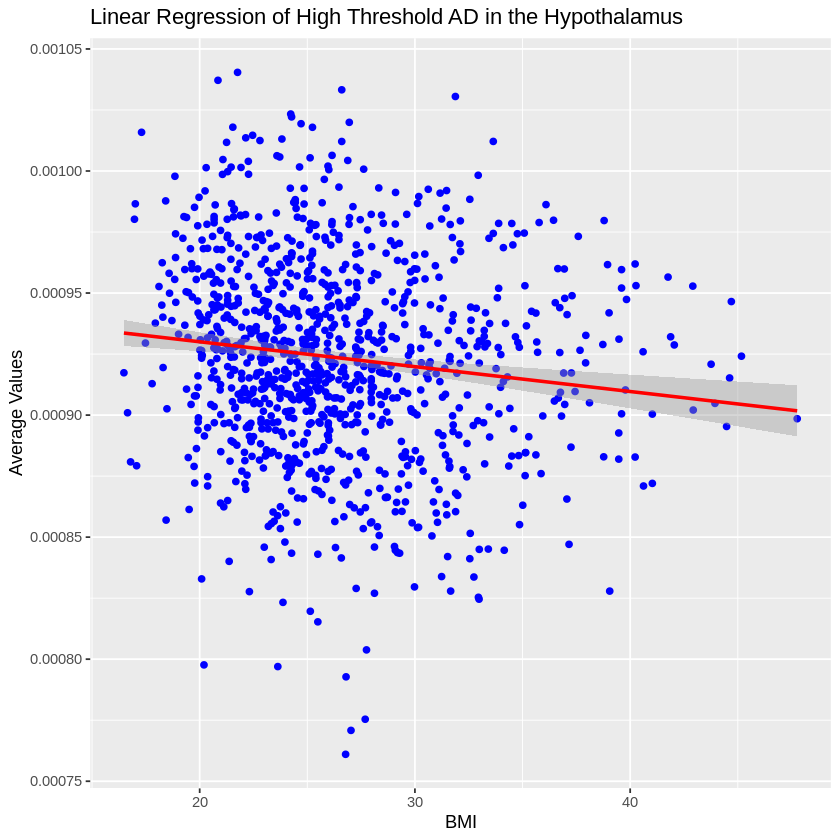

In [6]:
ad_data_bin <- "scratch//tractoflow_hcp_dwi/linear_regression/HCP_ad_data_bin.csv"
ad_data_bin <- read.table(ad_data_bin, sep=',', quote='"', header=T)
hypo <- c("ad_anterior_hypothalamic_area", "ad_arcuate_hypothalamic_nucleus", "ad_dorsomedial_hypothalamic_nucleus", "ad_lateral_hypothalamus", "ad_mammillary_bodies", "ad_paraventricular_nucleus", "ad_periventricular_hypothalamic_nucleus", "ad_posterior_hypothalamic_nucleus", "ad_suprachiasmatic_hypothalamic_nucleus", "ad_supraoptic_hypothalamic_nucleus", "ad_tuberomammillary_hypothalamic_nucleus", "ad_ventromedial_hypothalamus")
ad_data_bin$full_hypo <- rowMeans(ad_data_bin[, hypo], na.rm = TRUE)
lm <- lm(full_hypo ~ BMI+Age_in_Yrs+Gender, data=ad_data_bin)
summary <- summary(lm)
summary
point_count <- nrow(ad_data_bin)
ggplot(ad_data_bin, aes(x = BMI, y = full_hypo)) +
  geom_point(color = "blue") +
  geom_smooth(method = "lm", formula = y ~ x, se = TRUE, color = "red") +
  geom_text(aes(x = max(BMI), y = max(full_hypo)),
            label = paste("N =", point_count),
            hjust = 1, vjust = 1, color = "black") +
  labs(title = "Linear Regression of High Threshold AD in the Hypothalamus", x = "BMI", y = "Average Values")
sum(is.na(ad_data_bin))


Call:
lm(formula = full_hypo ~ BMI + Age_in_Yrs + Gender, data = fa_data_bin)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.058105 -0.012554 -0.000764  0.011956  0.072275 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.930e-01  5.314e-03  55.135   <2e-16 ***
BMI         -7.934e-05  1.115e-04  -0.712    0.477    
Age_in_Yrs  -7.440e-05  1.584e-04  -0.470    0.639    
GenderM     -1.784e-02  1.166e-03 -15.300   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01845 on 1060 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.1886,	Adjusted R-squared:  0.1863 
F-statistic: 82.13 on 3 and 1060 DF,  p-value: < 2.2e-16


Warning message:
“Removed 1 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 1065 rows containing missing values (`geom_text()`).”


[1] 1

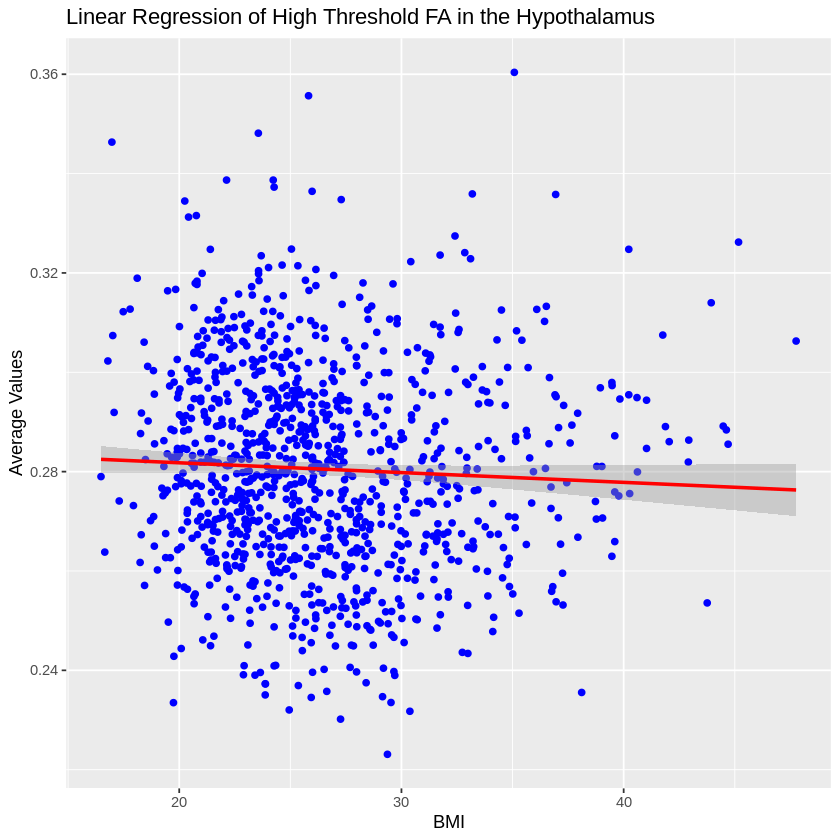

In [7]:
fa_data_bin <- "scratch//tractoflow_hcp_dwi/linear_regression/HCP_fa_data_bin.csv"
fa_data_bin <- read.table(fa_data_bin, sep=',', quote='"', header=T)
hypo <- c("fa_anterior_hypothalamic_area", "fa_arcuate_hypothalamic_nucleus", "fa_dorsal_periventricular_hypothalamic_nucleus", "fa_dorsomedial_hypothalamic_nucleus", "fa_lateral_hypothalamus", "fa_mammillary_bodies", "fa_medial_preoptic_nucleus", "fa_paraventricular_nucleus", "fa_periventricular_hypothalamic_nucleus", "fa_posterior_hypothalamic_nucleus", "fa_suprachiasmatic_hypothalamic_nucleus", "fa_supraoptic_hypothalamic_nucleus", "fa_tuberomammillary_hypothalamic_nucleus", "fa_ventromedial_hypothalamus")
fa_data_bin$full_hypo <- rowMeans(fa_data_bin[, hypo], na.rm = TRUE)
lm <- lm(full_hypo ~ BMI+Age_in_Yrs+Gender, data=fa_data_bin)
summary <- summary(lm)
summary
point_count <- nrow(fa_data_bin)
ggplot(fa_data_bin, aes(x = BMI, y = full_hypo)) +
  geom_point(color = "blue") +
  geom_smooth(method = "lm", formula = y ~ x, se = TRUE, color = "red") +
  geom_text(aes(x = max(BMI), y = max(full_hypo)),
            label = paste("N =", point_count),
            hjust = 1, vjust = 1, color = "black") +
  labs(title = "Linear Regression of High Threshold FA in the Hypothalamus", x = "BMI", y = "Average Values")
sum(is.na(fa_data_bin))


Call:
lm(formula = full_hypo ~ BMI + Age_in_Yrs + Gender, data = md_data_bin)

Residuals:
       Min         1Q     Median         3Q        Max 
-1.039e-04 -1.704e-05 -1.630e-07  1.756e-05  1.079e-04 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.571e-04  7.695e-06  98.383  < 2e-16 ***
BMI         -4.653e-07  1.614e-07  -2.882  0.00403 ** 
Age_in_Yrs  -1.053e-06  2.294e-07  -4.591 4.95e-06 ***
GenderM     -1.457e-05  1.689e-06  -8.626  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.671e-05 on 1060 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.08366,	Adjusted R-squared:  0.08107 
F-statistic: 32.26 on 3 and 1060 DF,  p-value: < 2.2e-16


Warning message:
“Removed 1 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 1065 rows containing missing values (`geom_text()`).”


[1] 1

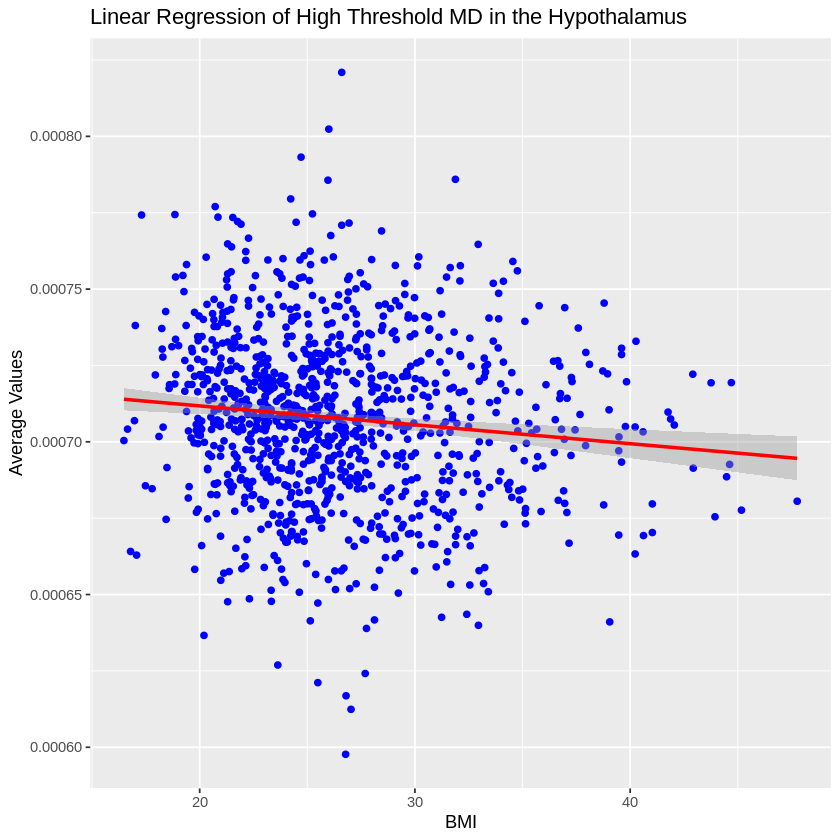

In [8]:
md_data_bin <- "scratch//tractoflow_hcp_dwi/linear_regression/HCP_md_data_bin.csv"
md_data_bin <- read.table(md_data_bin, sep=',', quote='"', header=T)
hypo <- c("md_anterior_hypothalamic_area", "md_arcuate_hypothalamic_nucleus", "md_dorsal_periventricular_hypothalamic_nucleus", "md_dorsomedial_hypothalamic_nucleus", "md_lateral_hypothalamus", "md_mammillary_bodies", "md_medial_preoptic_nucleus", "md_paraventricular_nucleus", "md_periventricular_hypothalamic_nucleus", "md_posterior_hypothalamic_nucleus", "md_suprachiasmatic_hypothalamic_nucleus", "md_supraoptic_hypothalamic_nucleus", "md_tuberomammillary_hypothalamic_nucleus", "md_ventromedial_hypothalamus")
md_data_bin$full_hypo <- rowMeans(md_data_bin[, hypo], na.rm = TRUE)
lm <- lm(full_hypo ~ BMI+Age_in_Yrs+Gender, data=md_data_bin)
summary <- summary(lm)
summary
point_count <- nrow(md_data_bin)
ggplot(md_data_bin, aes(x = BMI, y = full_hypo)) +
  geom_point(color = "blue") +
  geom_smooth(method = "lm", formula = y ~ x, se = TRUE, color = "red") +
  geom_text(aes(x = max(BMI), y = max(full_hypo)),
            label = paste("N =", point_count),
            hjust = 1, vjust = 1, color = "black") +
  labs(title = "Linear Regression of High Threshold MD in the Hypothalamus", x = "BMI", y = "Average Values")
sum(is.na(md_data_bin))


Call:
lm(formula = full_hypo ~ BMI + Age_in_Yrs + Gender, data = rd_data_bin)

Residuals:
       Min         1Q     Median         3Q        Max 
-8.881e-05 -1.665e-05 -6.210e-07  1.666e-05  1.116e-04 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.385e-04  7.445e-06  85.764  < 2e-16 ***
BMI         -3.603e-07  1.562e-07  -2.307 0.021266 *  
Age_in_Yrs  -8.330e-07  2.219e-07  -3.754 0.000184 ***
GenderM     -4.362e-06  1.634e-06  -2.669 0.007715 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.584e-05 on 1060 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.02351,	Adjusted R-squared:  0.02075 
F-statistic: 8.506 on 3 and 1060 DF,  p-value: 1.383e-05


Warning message:
“Removed 1 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 1065 rows containing missing values (`geom_text()`).”


[1] 1

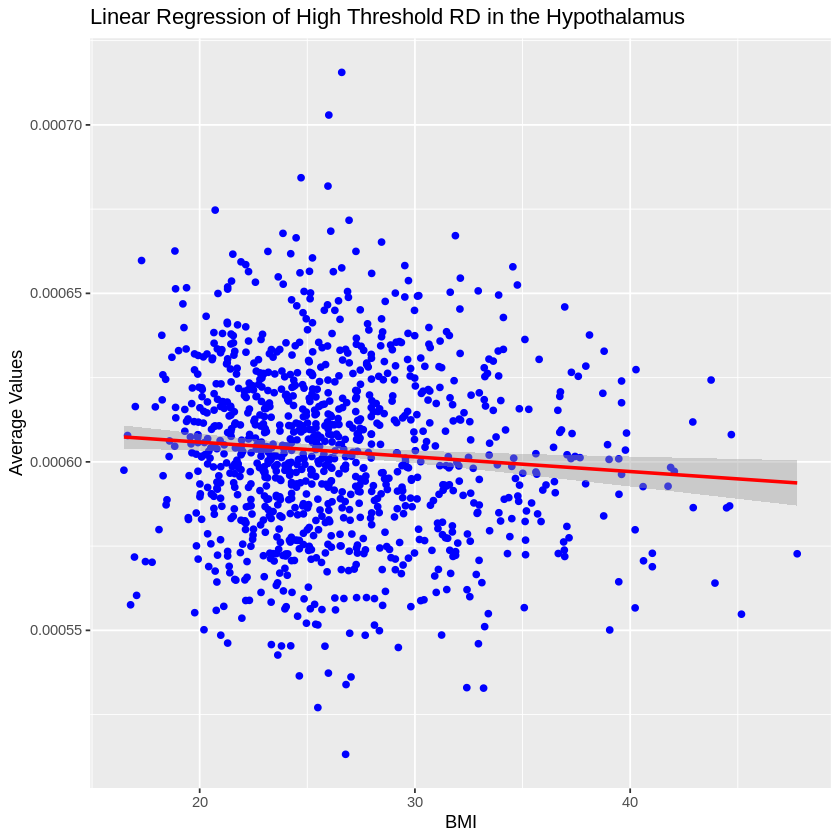

In [9]:
rd_data_bin <- "scratch//tractoflow_hcp_dwi/linear_regression/HCP_rd_data_bin.csv"
rd_data_bin <- read.table(rd_data_bin, sep=',', quote='"', header=T)
hypo <- c("rd_anterior_hypothalamic_area", "rd_arcuate_hypothalamic_nucleus", "rd_dorsal_periventricular_hypothalamic_nucleus", "rd_dorsomedial_hypothalamic_nucleus", "rd_lateral_hypothalamus", "rd_mammillary_bodies", "rd_medial_preoptic_nucleus", "rd_paraventricular_nucleus", "rd_periventricular_hypothalamic_nucleus", "rd_posterior_hypothalamic_nucleus", "rd_suprachiasmatic_hypothalamic_nucleus", "rd_supraoptic_hypothalamic_nucleus", "rd_tuberomammillary_hypothalamic_nucleus", "rd_ventromedial_hypothalamus")
rd_data_bin$full_hypo <- rowMeans(rd_data_bin[, hypo], na.rm = TRUE)
lm <- lm(full_hypo ~ BMI+Age_in_Yrs+Gender, data=rd_data_bin)
summary <- summary(lm)
summary
point_count <- nrow(rd_data_bin)
ggplot(rd_data_bin, aes(x = BMI, y = full_hypo)) +
  geom_point(color = "blue") +
  geom_smooth(method = "lm", formula = y ~ x, se = TRUE, color = "red") +
  geom_text(aes(x = max(BMI), y = max(full_hypo)),
            label = paste("N =", point_count),
            hjust = 1, vjust = 1, color = "black") +
  labs(title = "Linear Regression of High Threshold RD in the Hypothalamus", x = "BMI", y = "Average Values")
sum(is.na(rd_data_bin))

In [10]:
colnames(HCP_ad_data)

[1] "Subject"                                       
 [2] "Age_in_Yrs"                                    
 [3] "X"                                             
 [4] "BMI"                                           
 [5] "Gender"                                        
 [6] "ad_anterior_hypothalamic_area"                 
 [7] "ad_arcuate_hypothalamic_nucleus"               
 [8] "ad_dorsal_periventricular_hypothalamic_nucleus"
 [9] "ad_dorsomedial_hypothalamic_nucleus"           
[10] "ad_lateral_hypothalamus"                       
[11] "ad_mammillary_bodies"                          
[12] "ad_medial_preoptic_nucleus"                    
[13] "ad_paraventricular_nucleus"                    
[14] "ad_periventricular_hypothalamic_nucleus"       
[15] "ad_posterior_hypothalamic_nucleus"             
[16] "ad_suprachiasmatic_hypothalamic_nucleus"       
[17] "ad_supraoptic_hypothalamic_nucleus"            
[18] "ad_tuberomammillary_hypothalamic_nucleus"      
[19] "ad_ventromedial_hypothalamus"                  
[20] "SSAGA_Income"                                  
[21] "SSAGA_Educ"                                    
[22] "BPSystolic"                                    
[23] "BPDiastolic"                                   
[24] "HbA1C"                                         
[25] "full_hypo"

In [11]:
hypo <- c("ad_anterior_hypothalamic_area", "ad_arcuate_hypothalamic_nucleus", "ad_dorsomedial_hypothalamic_nucleus", "ad_lateral_hypothalamus", "ad_mammillary_bodies", "ad_paraventricular_nucleus", "ad_periventricular_hypothalamic_nucleus", "ad_posterior_hypothalamic_nucleus", "ad_suprachiasmatic_hypothalamic_nucleus", "ad_supraoptic_hypothalamic_nucleus", "ad_tuberomammillary_hypothalamic_nucleus", "ad_ventromedial_hypothalamus")
HCP_ad_data$full_hypo <- rowMeans(HCP_ad_data[, hypo], na.rm = TRUE)
lm <- lm(full_hypo ~ BPSystolic+Age_in_Yrs+Gender+SSAGA_Income+SSAGA_Educ, data=HCP_ad_data)
HCP_ad_sys_bp_summary <- summary(lm)
HCP_ad_sys_bp_summary
point_count <- nrow(HCP_ad_data)
HCP_ad_sys_bp_plot <- ggplot(HCP_ad_data, aes(x = BPSystolic, y = full_hypo)) +
  geom_point(color = "blue") +
  geom_smooth(method = "lm", formula = y ~ x, se = TRUE, color = "red") +
  geom_text(aes(x = max(BPSystolic), y = max(full_hypo)),
            label = paste("N =", point_count),
            hjust = 1, vjust = 1, color = "black") +
  labs(title = "HCP AD and Systolic Blood Pressure Correlation in the Hypothalamus", x = "Systolic BP", y = "Average Values")
sum(is.na(HCP_ad_data))

lm <- lm(full_hypo ~ BPDiastolic+Age_in_Yrs+Gender+SSAGA_Income+SSAGA_Educ, data=HCP_ad_data)
HCP_ad_dia_bp_summary <- summary(lm)
HCP_ad_dia_bp_summary
point_count <- nrow(HCP_ad_data)
HCP_ad_dia_bp_plot <- ggplot(HCP_ad_data, aes(x = BPDiastolic, y = full_hypo)) +
  geom_point(color = "blue") +
  geom_smooth(method = "lm", formula = y ~ x, se = TRUE, color = "red") +
  geom_text(aes(x = max(BPDiastolic), y = max(full_hypo)),
            label = paste("N =", point_count),
            hjust = 1, vjust = 1, color = "black") +
  labs(title = "HCP AD and Diastolic Blood Pressure Correlation in the Hypothalamus", x = "Diastolic BP", y = "Average Values")
sum(is.na(HCP_ad_data))

lm <- lm(full_hypo ~ HbA1C+Age_in_Yrs+Gender+SSAGA_Income+SSAGA_Educ, data=HCP_ad_data)
HCP_ad_hba1c_summary <- summary(lm)
HCP_ad_hba1c_summary
point_count <- nrow(HCP_ad_data)
HCP_ad_hba1c_plot <- ggplot(HCP_ad_data, aes(x = HbA1C, y = full_hypo)) +
  geom_point(color = "blue") +
  geom_smooth(method = "lm", formula = y ~ x, se = TRUE, color = "red") +
  geom_text(aes(x = max(HbA1C), y = max(full_hypo)),
            label = paste("N =", point_count),
            hjust = 1, vjust = 1, color = "black") +
  labs(title = "HCP AD and HBA1C Correlation in the Hypothalamus", x = "HBA1C", y = "Average Values")
sum(is.na(HCP_ad_data))


Call:
lm(formula = full_hypo ~ BPSystolic + Age_in_Yrs + Gender + SSAGA_Income + 
    SSAGA_Educ, data = HCP_ad_data)

Residuals:
       Min         1Q     Median         3Q        Max 
-1.477e-04 -2.339e-05  1.516e-06  2.387e-05  9.962e-05 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   9.957e-04  1.747e-05  56.981  < 2e-16 ***
BPSystolic   -2.446e-07  8.647e-08  -2.828  0.00477 ** 
Age_in_Yrs   -1.757e-06  3.291e-07  -5.339 1.15e-07 ***
GenderM      -3.446e-05  2.439e-06 -14.130  < 2e-16 ***
SSAGA_Income  5.294e-07  5.833e-07   0.907  0.36437    
SSAGA_Educ    1.457e-06  6.788e-07   2.146  0.03210 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.648e-05 on 1041 degrees of freedom
  (18 observations deleted due to missingness)
Multiple R-squared:  0.2056,	Adjusted R-squared:  0.2018 
F-statistic: 53.89 on 5 and 1041 DF,  p-value: < 2.2e-16


[1] 356


Call:
lm(formula = full_hypo ~ BPDiastolic + Age_in_Yrs + Gender + 
    SSAGA_Income + SSAGA_Educ, data = HCP_ad_data)

Residuals:
       Min         1Q     Median         3Q        Max 
-1.460e-04 -2.362e-05  1.518e-06  2.395e-05  9.710e-05 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   9.745e-04  1.561e-05  62.448  < 2e-16 ***
BPDiastolic  -1.461e-07  1.091e-07  -1.339   0.1808    
Age_in_Yrs   -1.728e-06  3.311e-07  -5.218 2.18e-07 ***
GenderM      -3.600e-05  2.367e-06 -15.209  < 2e-16 ***
SSAGA_Income  5.461e-07  5.852e-07   0.933   0.3510    
SSAGA_Educ    1.586e-06  6.789e-07   2.336   0.0197 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.659e-05 on 1041 degrees of freedom
  (18 observations deleted due to missingness)
Multiple R-squared:  0.2009,	Adjusted R-squared:  0.197 
F-statistic: 52.33 on 5 and 1041 DF,  p-value: < 2.2e-16


[1] 356


Call:
lm(formula = full_hypo ~ HbA1C + Age_in_Yrs + Gender + SSAGA_Income + 
    SSAGA_Educ, data = HCP_ad_data)

Residuals:
       Min         1Q     Median         3Q        Max 
-1.439e-04 -2.371e-05  1.827e-06  2.404e-05  9.876e-05 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   9.686e-04  2.557e-05  37.873  < 2e-16 ***
HbA1C         8.396e-08  3.640e-06   0.023    0.982    
Age_in_Yrs   -1.759e-06  4.015e-07  -4.382 1.35e-05 ***
GenderM      -3.715e-05  2.799e-06 -13.273  < 2e-16 ***
SSAGA_Income  3.942e-07  6.999e-07   0.563    0.573    
SSAGA_Educ    1.274e-06  8.329e-07   1.529    0.127    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.699e-05 on 732 degrees of freedom
  (327 observations deleted due to missingness)
Multiple R-squared:  0.2018,	Adjusted R-squared:  0.1964 
F-statistic: 37.02 on 5 and 732 DF,  p-value: < 2.2e-16


[1] 356

In [12]:
hypo <- c("fa_anterior_hypothalamic_area", "fa_arcuate_hypothalamic_nucleus", "fa_dorsal_periventricular_hypothalamic_nucleus", "fa_dorsomedial_hypothalamic_nucleus", "fa_lateral_hypothalamus", "fa_mammillary_bodies", "fa_medial_preoptic_nucleus", "fa_paraventricular_nucleus", "fa_periventricular_hypothalamic_nucleus", "fa_posterior_hypothalamic_nucleus", "fa_suprachiasmatic_hypothalamic_nucleus", "fa_supraoptic_hypothalamic_nucleus", "fa_tuberomammillary_hypothalamic_nucleus", "fa_ventromedial_hypothalamus")
HCP_fa_data$full_hypo <- rowMeans(HCP_fa_data[, hypo], na.rm = TRUE)
lm <- lm(full_hypo ~ BPSystolic+Age_in_Yrs+Gender+SSAGA_Income+SSAGA_Educ, data=HCP_fa_data)
HCP_fa_sys_bp_summary <- summary(lm)
HCP_fa_sys_bp_summary
point_count <- nrow(HCP_fa_data)
HCP_fa_sys_bp_plot <- ggplot(HCP_fa_data, aes(x = BPSystolic, y = full_hypo)) +
  geom_point(color = "blue") +
  geom_smooth(method = "lm", formula = y ~ x, se = TRUE, color = "red") +
  geom_text(aes(x = max(BPSystolic), y = max(full_hypo)),
            label = paste("N =", point_count),
            hjust = 1, vjust = 1, color = "black") +
  labs(title = "HCP FA and Systolic Blood Pressure Correlation in the Hypothalamus", x = "Systolic BP", y = "Average Values")
sum(is.na(HCP_fa_data))

lm <- lm(full_hypo ~ BPDiastolic+Age_in_Yrs+Gender+SSAGA_Income+SSAGA_Educ, data=HCP_fa_data)
HCP_fa_dia_bp_summary <- summary(lm)
HCP_fa_dia_bp_summary
point_count <- nrow(HCP_fa_data)
HCP_fa_dia_bp_plot <- ggplot(HCP_fa_data, aes(x = BPDiastolic, y = full_hypo)) +
  geom_point(color = "blue") +
  geom_smooth(method = "lm", formula = y ~ x, se = TRUE, color = "red") +
  geom_text(aes(x = max(BPDiastolic), y = max(full_hypo)),
            label = paste("N =", point_count),
            hjust = 1, vjust = 1, color = "black") +
  labs(title = "HCP FA and Diastolic Blood Pressure Correlation in the Hypothalamus", x = "Diastolic BP", y = "Average Values")
sum(is.na(HCP_fa_data))

lm <- lm(full_hypo ~ HbA1C+Age_in_Yrs+Gender+SSAGA_Income+SSAGA_Educ, data=HCP_fa_data)
HCP_fa_hba1c_summary <- summary(lm)
HCP_fa_hba1c_summary
point_count <- nrow(HCP_fa_data)
HCP_fa_hba1c_plot <- ggplot(HCP_fa_data, aes(x = HbA1C, y = full_hypo)) +
  geom_point(color = "blue") +
  geom_smooth(method = "lm", formula = y ~ x, se = TRUE, color = "red") +
  geom_text(aes(x = max(HbA1C), y = max(full_hypo)),
            label = paste("N =", point_count),
            hjust = 1, vjust = 1, color = "black") +
  labs(title = "HCP FA and HBA1C Correlation in the Hypothalamus", x = "HBA1C", y = "Average Values")
sum(is.na(HCP_fa_data))


Call:
lm(formula = full_hypo ~ BPSystolic + Age_in_Yrs + Gender + SSAGA_Income + 
    SSAGA_Educ, data = HCP_fa_data)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.057089 -0.012755 -0.000469  0.012066  0.073339 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.928e-01  8.814e-03  33.223   <2e-16 ***
BPSystolic   -6.375e-05  4.361e-05  -1.462    0.144    
Age_in_Yrs   -6.935e-05  1.660e-04  -0.418    0.676    
GenderM      -1.744e-02  1.230e-03 -14.175   <2e-16 ***
SSAGA_Income -3.394e-04  2.942e-04  -1.153    0.249    
SSAGA_Educ    4.917e-04  3.424e-04   1.436    0.151    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0184 on 1041 degrees of freedom
  (18 observations deleted due to missingness)
Multiple R-squared:  0.1954,	Adjusted R-squared:  0.1916 
F-statistic: 50.57 on 5 and 1041 DF,  p-value: < 2.2e-16


[1] 356


Call:
lm(formula = full_hypo ~ BPDiastolic + Age_in_Yrs + Gender + 
    SSAGA_Income + SSAGA_Educ, data = HCP_fa_data)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.056317 -0.012565 -0.000525  0.011843  0.074011 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.893e-01  7.851e-03  36.848   <2e-16 ***
BPDiastolic  -6.482e-05  5.487e-05  -1.181    0.238    
Age_in_Yrs   -5.528e-05  1.666e-04  -0.332    0.740    
GenderM      -1.774e-02  1.191e-03 -14.897   <2e-16 ***
SSAGA_Income -3.395e-04  2.944e-04  -1.153    0.249    
SSAGA_Educ    5.163e-04  3.415e-04   1.512    0.131    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01841 on 1041 degrees of freedom
  (18 observations deleted due to missingness)
Multiple R-squared:  0.1948,	Adjusted R-squared:  0.191 
F-statistic: 50.38 on 5 and 1041 DF,  p-value: < 2.2e-16


[1] 356


Call:
lm(formula = full_hypo ~ HbA1C + Age_in_Yrs + Gender + SSAGA_Income + 
    SSAGA_Educ, data = HCP_fa_data)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.057093 -0.012709  0.000273  0.012134  0.066101 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.2776106  0.0125769  22.073   <2e-16 ***
HbA1C         0.0003446  0.0017901   0.192   0.8474    
Age_in_Yrs   -0.0001347  0.0001975  -0.682   0.4953    
GenderM      -0.0178216  0.0013767 -12.945   <2e-16 ***
SSAGA_Income -0.0004466  0.0003442  -1.298   0.1949    
SSAGA_Educ    0.0009949  0.0004096   2.429   0.0154 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01819 on 732 degrees of freedom
  (327 observations deleted due to missingness)
Multiple R-squared:  0.2002,	Adjusted R-squared:  0.1947 
F-statistic: 36.65 on 5 and 732 DF,  p-value: < 2.2e-16


[1] 356

Warning message:
“Removed 12 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 12 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 1065 rows containing missing values (`geom_text()`).”
Warning message:
“Removed 12 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 12 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 1065 rows containing missing values (`geom_text()`).”


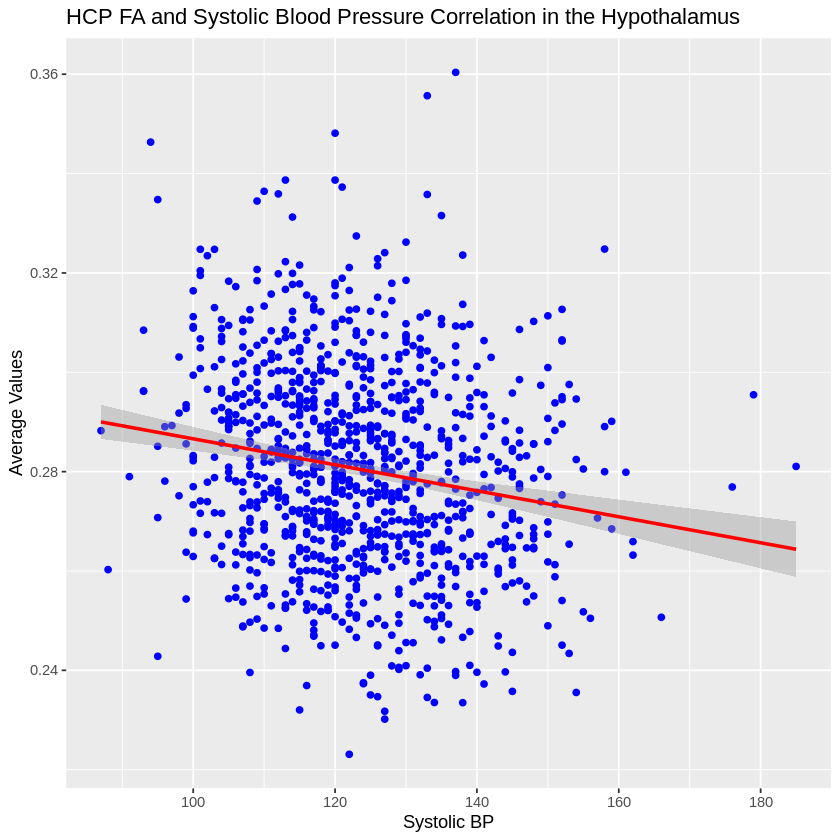

Warning message:
“Removed 324 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 324 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 1065 rows containing missing values (`geom_text()`).”


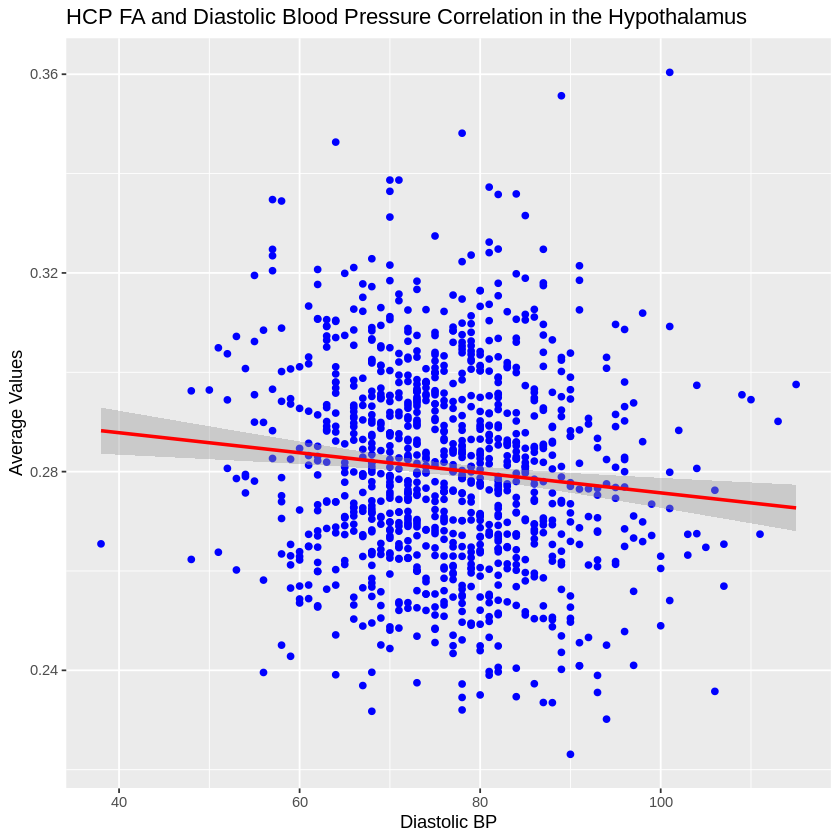

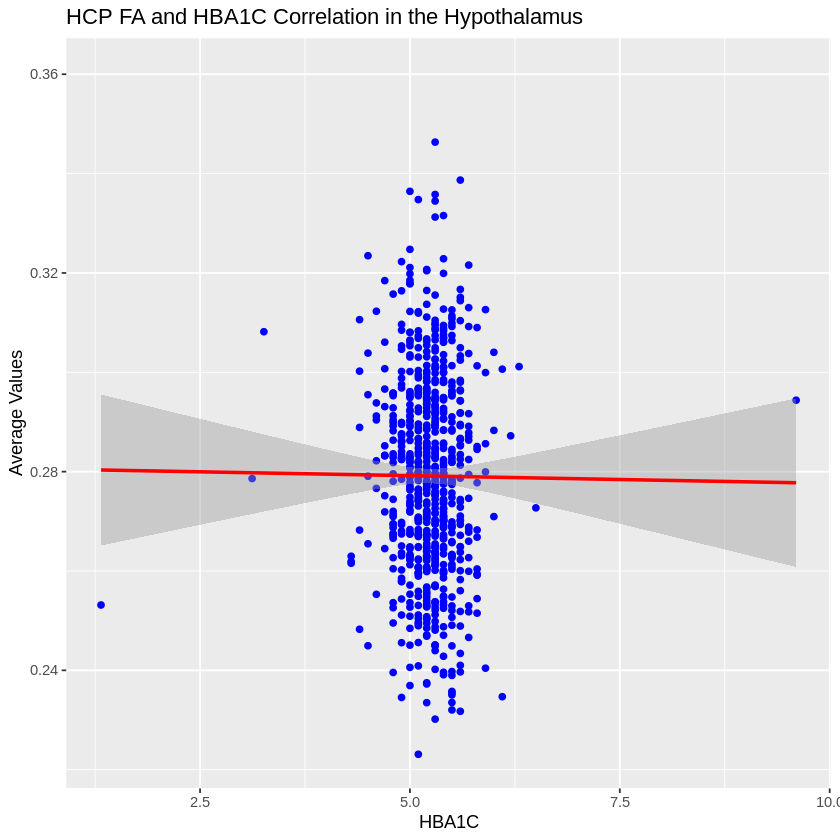

In [5]:
HCP_fa_sys_bp_plot
HCP_fa_dia_bp_plot
HCP_fa_hba1c_plot

In [42]:
hypo <- c("md_anterior_hypothalamic_area", "md_arcuate_hypothalamic_nucleus", "md_dorsal_periventricular_hypothalamic_nucleus", "md_dorsomedial_hypothalamic_nucleus", "md_lateral_hypothalamus", "md_mammillary_bodies", "md_medial_preoptic_nucleus", "md_paraventricular_nucleus", "md_periventricular_hypothalamic_nucleus", "md_posterior_hypothalamic_nucleus", "md_suprachiasmatic_hypothalamic_nucleus", "md_supraoptic_hypothalamic_nucleus", "md_tuberomammillary_hypothalamic_nucleus", "md_ventromedial_hypothalamus")
HCP_md_data$full_hypo <- rowMeans(HCP_md_data[, hypo], na.rm = TRUE)
lm <- lm(full_hypo ~ BPSystolic+Age_in_Yrs+Gender+SSAGA_Income+SSAGA_Educ, data=HCP_md_data)
HCP_md_sys_bp_summary <- summary(lm)
HCP_md_sys_bp_summary
point_count <- nrow(HCP_md_data)
HCP_md_sys_bp_plot <- ggplot(HCP_md_data, aes(x = BPSystolic, y = full_hypo)) +
  geom_point(color = "blue") +
  geom_smooth(method = "lm", formula = y ~ x, se = TRUE, color = "red") +
  geom_text(aes(x = max(BPSystolic), y = max(full_hypo)),
            label = paste("N =", point_count),
            hjust = 1, vjust = 1, color = "black") +
  labs(title = "HCP MD and Systolic Blood Pressure Correlation in the Hypothalamus", x = "Systolic BP", y = "Average Values")
sum(is.na(HCP_md_data))

lm <- lm(full_hypo ~ BPDiastolic+Age_in_Yrs+Gender+SSAGA_Income+SSAGA_Educ, data=HCP_md_data)
HCP_md_dia_bp_summary <- summary(lm)
HCP_md_dia_bp_summary
point_count <- nrow(HCP_md_data)
HCP_md_dia_bp_plot <- ggplot(HCP_md_data, aes(x = BPDiastolic, y = full_hypo)) +
  geom_point(color = "blue") +
  geom_smooth(method = "lm", formula = y ~ x, se = TRUE, color = "red") +
  geom_text(aes(x = max(BPDiastolic), y = max(full_hypo)),
            label = paste("N =", point_count),
            hjust = 1, vjust = 1, color = "black") +
  labs(title = "HCP MD and Diastolic Blood Pressure Correlation in the Hypothalamus", x = "Diastolic BP", y = "Average Values")
sum(is.na(HCP_md_data))

lm <- lm(full_hypo ~ HbA1C+Age_in_Yrs+Gender+SSAGA_Income+SSAGA_Educ, data=HCP_md_data)
HCP_md_hba1c_summary <- summary(lm)
HCP_md_hba1c_summary
point_count <- nrow(HCP_md_data)
HCP_md_hba1c_plot <- ggplot(HCP_md_data, aes(x = HbA1C, y = full_hypo)) +
  geom_point(color = "blue") +
  geom_smooth(method = "lm", formula = y ~ x, se = TRUE, color = "red") +
  geom_text(aes(x = max(HbA1C), y = max(full_hypo)),
            label = paste("N =", point_count),
            hjust = 1, vjust = 1, color = "black") +
  labs(title = "HCP MD and HBA1C Correlation in the Hypothalamus", x = "HBA1C", y = "Average Values")
sum(is.na(HCP_md_data))


Call:
lm(formula = full_hypo ~ BPSystolic + Age_in_Yrs + Gender + SSAGA_Income + 
    SSAGA_Educ, data = HCP_md_data)

Residuals:
       Min         1Q     Median         3Q        Max 
-9.566e-05 -1.706e-05 -2.120e-07  1.759e-05  1.091e-04 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   7.524e-04  1.280e-05  58.759  < 2e-16 ***
BPSystolic   -1.344e-07  6.336e-08  -2.121   0.0341 *  
Age_in_Yrs   -1.230e-06  2.412e-07  -5.100 4.04e-07 ***
GenderM      -1.371e-05  1.787e-06  -7.670 3.92e-14 ***
SSAGA_Income  5.710e-07  4.275e-07   1.336   0.1819    
SSAGA_Educ    7.221e-07  4.974e-07   1.452   0.1469    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.673e-05 on 1041 degrees of freedom
  (18 observations deleted due to missingness)
Multiple R-squared:  0.08448,	Adjusted R-squared:  0.08009 
F-statistic: 19.21 on 5 and 1041 DF,  p-value: < 2.2e-16


[1] 356


Call:
lm(formula = full_hypo ~ BPDiastolic + Age_in_Yrs + Gender + 
    SSAGA_Income + SSAGA_Educ, data = HCP_md_data)

Residuals:
       Min         1Q     Median         3Q        Max 
-9.856e-05 -1.697e-05 -3.520e-07  1.702e-05  1.089e-04 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   7.388e-04  1.142e-05  64.677  < 2e-16 ***
BPDiastolic  -5.415e-08  7.984e-08  -0.678    0.498    
Age_in_Yrs   -1.220e-06  2.424e-07  -5.033 5.68e-07 ***
GenderM      -1.465e-05  1.733e-06  -8.457  < 2e-16 ***
SSAGA_Income  5.845e-07  4.284e-07   1.365    0.173    
SSAGA_Educ    8.019e-07  4.970e-07   1.614    0.107    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.678e-05 on 1041 degrees of freedom
  (18 observations deleted due to missingness)
Multiple R-squared:  0.08093,	Adjusted R-squared:  0.07652 
F-statistic: 18.33 on 5 and 1041 DF,  p-value: < 2.2e-16


[1] 356


Call:
lm(formula = full_hypo ~ HbA1C + Age_in_Yrs + Gender + SSAGA_Income + 
    SSAGA_Educ, data = HCP_md_data)

Residuals:
       Min         1Q     Median         3Q        Max 
-1.001e-04 -1.751e-05  1.700e-07  1.733e-05  1.092e-04 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   7.462e-04  1.896e-05  39.358  < 2e-16 ***
HbA1C        -7.589e-07  2.699e-06  -0.281    0.779    
Age_in_Yrs   -1.186e-06  2.977e-07  -3.985 7.41e-05 ***
GenderM      -1.532e-05  2.075e-06  -7.380 4.30e-13 ***
SSAGA_Income  5.992e-07  5.188e-07   1.155    0.248    
SSAGA_Educ    2.241e-07  6.175e-07   0.363    0.717    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.742e-05 on 732 degrees of freedom
  (327 observations deleted due to missingness)
Multiple R-squared:  0.07822,	Adjusted R-squared:  0.07192 
F-statistic: 12.42 on 5 and 732 DF,  p-value: 1.376e-11


[1] 356

Warning message:
“Removed 12 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 12 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 1065 rows containing missing values (`geom_text()`).”
Warning message:
“Removed 12 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 12 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 1065 rows containing missing values (`geom_text()`).”


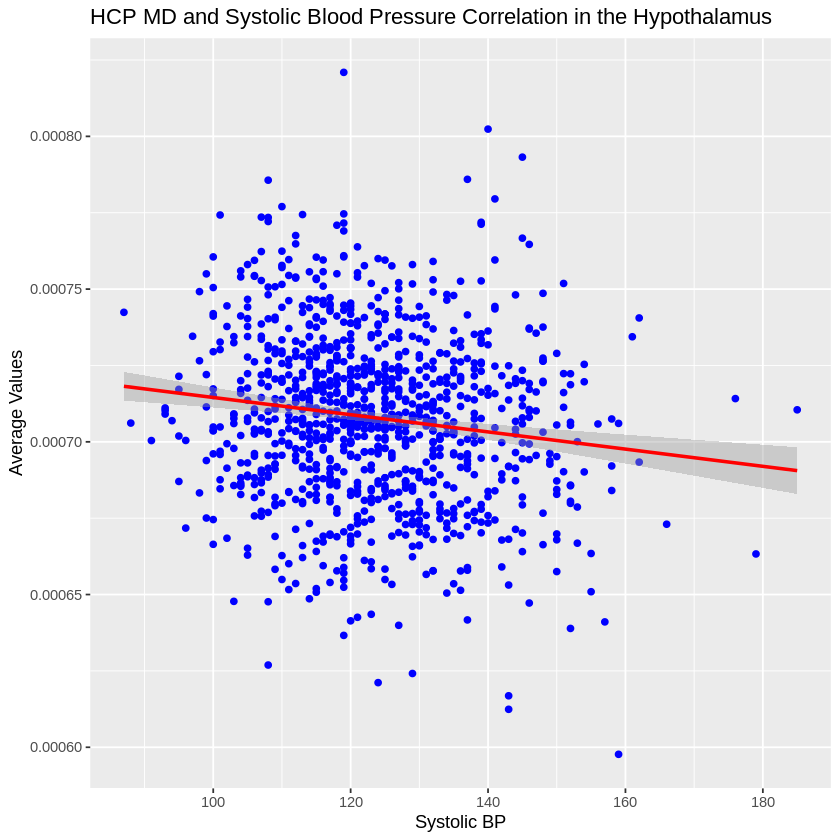

Warning message:
“Removed 324 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 324 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 1065 rows containing missing values (`geom_text()`).”


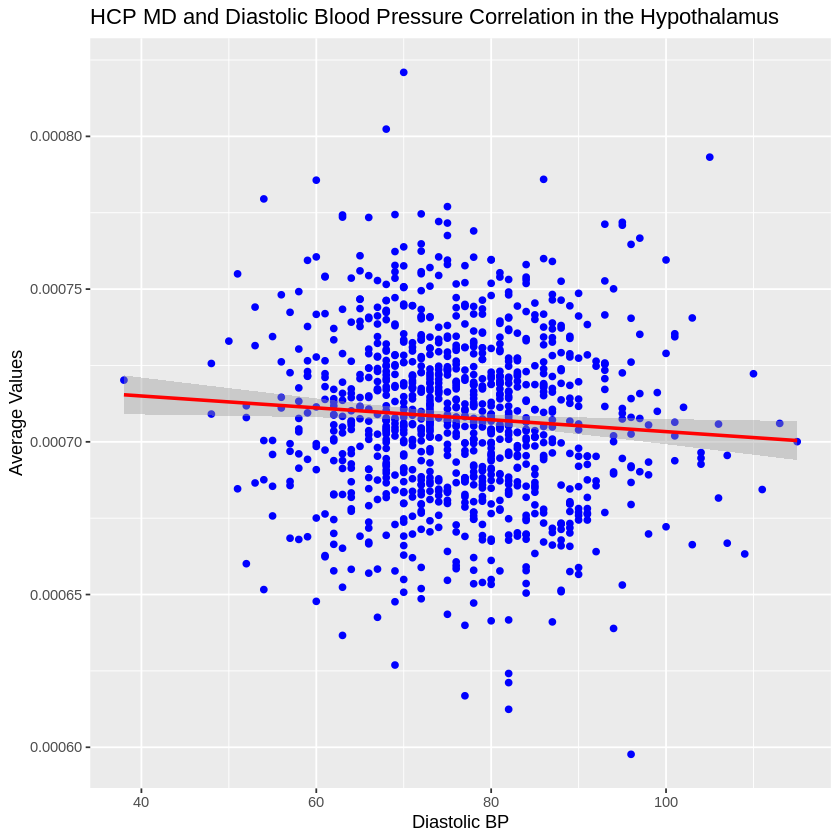

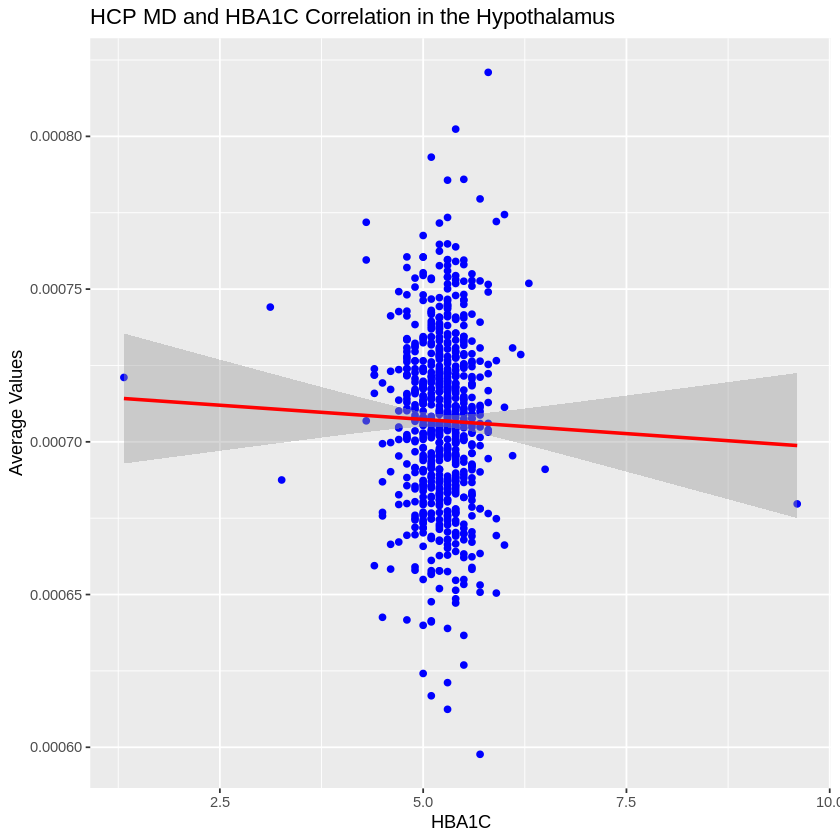

In [9]:
HCP_md_sys_bp_plot
HCP_md_dia_bp_plot
HCP_md_hba1c_plot

In [41]:
hypo <- c("rd_anterior_hypothalamic_area", "rd_arcuate_hypothalamic_nucleus", "rd_dorsal_periventricular_hypothalamic_nucleus", "rd_dorsomedial_hypothalamic_nucleus", "rd_lateral_hypothalamus", "rd_mammillary_bodies", "rd_medial_preoptic_nucleus", "rd_paraventricular_nucleus", "rd_periventricular_hypothalamic_nucleus", "rd_posterior_hypothalamic_nucleus", "rd_suprachiasmatic_hypothalamic_nucleus", "rd_supraoptic_hypothalamic_nucleus", "rd_tuberomammillary_hypothalamic_nucleus", "rd_ventromedial_hypothalamus")
HCP_rd_data$full_hypo <- rowMeans(HCP_rd_data[, hypo], na.rm = TRUE)
lm <- lm(full_hypo ~ BPSystolic+Age_in_Yrs+Gender+SSAGA_Income+SSAGA_Educ, data=HCP_rd_data)
HCP_rd_sys_bp_summary <- summary(lm)
HCP_rd_sys_bp_summary
point_count <- nrow(HCP_rd_data)
HCP_rd_sys_bp_plot <- ggplot(HCP_rd_data, aes(x = BPSystolic, y = full_hypo)) +
  geom_point(color = "blue") +
  geom_smooth(method = "lm", formula = y ~ x, se = TRUE, color = "red") +
  geom_text(aes(x = max(BPSystolic), y = max(full_hypo)),
            label = paste("N =", point_count),
            hjust = 1, vjust = 1, color = "black") +
  labs(title = "HCP RD and Systolic Blood Pressure Correlation in the Hypothalamus", x = "Systolic BP", y = "Average Values")
sum(is.na(HCP_rd_data))

lm <- lm(full_hypo ~ BPDiastolic+Age_in_Yrs+Gender+SSAGA_Income+SSAGA_Educ, data=HCP_rd_data)
HCP_rd_dia_bp_summary <- summary(lm)
HCP_rd_dia_bp_summary
point_count <- nrow(HCP_rd_data)
HCP_rd_dia_bp_plot <- ggplot(HCP_rd_data, aes(x = BPDiastolic, y = full_hypo)) +
  geom_point(color = "blue") +
  geom_smooth(method = "lm", formula = y ~ x, se = TRUE, color = "red") +
  geom_text(aes(x = max(BPDiastolic), y = max(full_hypo)),
            label = paste("N =", point_count),
            hjust = 1, vjust = 1, color = "black") +
  labs(title = "HCP RD and Diastolic Blood Pressure Correlation in the Hypothalamus", x = "Diastolic BP", y = "Average Values")
sum(is.na(HCP_rd_data))

lm <- lm(full_hypo ~ HbA1C+Age_in_Yrs+Gender+SSAGA_Income+SSAGA_Educ, data=HCP_rd_data)
HCP_rd_hba1c_summary <- summary(lm)
HCP_rd_hba1c_summary
point_count <- nrow(HCP_rd_data)
HCP_rd_hba1c_plot <- ggplot(HCP_rd_data, aes(x = HbA1C, y = full_hypo)) +
  geom_point(color = "blue") +
  geom_smooth(method = "lm", formula = y ~ x, se = TRUE, color = "red") +
  geom_text(aes(x = max(HbA1C), y = max(full_hypo)),
            label = paste("N =", point_count),
            hjust = 1, vjust = 1, color = "black") +
  labs(title = "HCP RD and HBA1C Correlation in the Hypothalamus", x = "HBA1C", y = "Average Values")
sum(is.na(HCP_rd_data))


Call:
lm(formula = full_hypo ~ BPSystolic + Age_in_Yrs + Gender + SSAGA_Income + 
    SSAGA_Educ, data = HCP_rd_data)

Residuals:
       Min         1Q     Median         3Q        Max 
-8.262e-05 -1.726e-05 -2.660e-07  1.663e-05  1.127e-04 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   6.343e-04  1.237e-05  51.271  < 2e-16 ***
BPSystolic   -8.801e-08  6.122e-08  -1.438   0.1509    
Age_in_Yrs   -9.859e-07  2.330e-07  -4.231 2.53e-05 ***
GenderM      -3.810e-06  1.727e-06  -2.206   0.0276 *  
SSAGA_Income  6.082e-07  4.130e-07   1.473   0.1412    
SSAGA_Educ    4.408e-07  4.806e-07   0.917   0.3593    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.583e-05 on 1041 degrees of freedom
  (18 observations deleted due to missingness)
Multiple R-squared:  0.02414,	Adjusted R-squared:  0.01945 
F-statistic:  5.15 on 5 and 1041 DF,  p-value: 0.0001128


[1] 356


Call:
lm(formula = full_hypo ~ BPDiastolic + Age_in_Yrs + Gender + 
    SSAGA_Income + SSAGA_Educ, data = HCP_rd_data)

Residuals:
       Min         1Q     Median         3Q        Max 
-8.480e-05 -1.722e-05 -1.760e-07  1.660e-05  1.127e-04 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   6.242e-04  1.103e-05  56.606  < 2e-16 ***
BPDiastolic  -1.826e-08  7.707e-08  -0.237  0.81272    
Age_in_Yrs   -9.836e-07  2.340e-07  -4.204 2.85e-05 ***
GenderM      -4.493e-06  1.673e-06  -2.686  0.00734 ** 
SSAGA_Income  6.199e-07  4.135e-07   1.499  0.13412    
SSAGA_Educ    4.989e-07  4.797e-07   1.040  0.29859    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.585e-05 on 1041 degrees of freedom
  (18 observations deleted due to missingness)
Multiple R-squared:  0.02226,	Adjusted R-squared:  0.01756 
F-statistic: 4.739 on 5 and 1041 DF,  p-value: 0.0002752


[1] 356


Call:
lm(formula = full_hypo ~ HbA1C + Age_in_Yrs + Gender + SSAGA_Income + 
    SSAGA_Educ, data = HCP_rd_data)

Residuals:
       Min         1Q     Median         3Q        Max 
-8.604e-05 -1.774e-05 -3.530e-07  1.708e-05  1.125e-04 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   6.365e-04  1.821e-05  34.961  < 2e-16 ***
HbA1C        -1.028e-06  2.592e-06  -0.397  0.69174    
Age_in_Yrs   -9.063e-07  2.859e-07  -3.171  0.00158 ** 
GenderM      -5.018e-06  1.993e-06  -2.518  0.01202 *  
SSAGA_Income  7.052e-07  4.983e-07   1.415  0.15742    
SSAGA_Educ   -2.195e-07  5.930e-07  -0.370  0.71134    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.633e-05 on 732 degrees of freedom
  (327 observations deleted due to missingness)
Multiple R-squared:  0.0194,	Adjusted R-squared:  0.0127 
F-statistic: 2.896 on 5 and 732 DF,  p-value: 0.01342


[1] 356